Basic Neutron Model and Network Visualization

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Neuron output: 0.4979


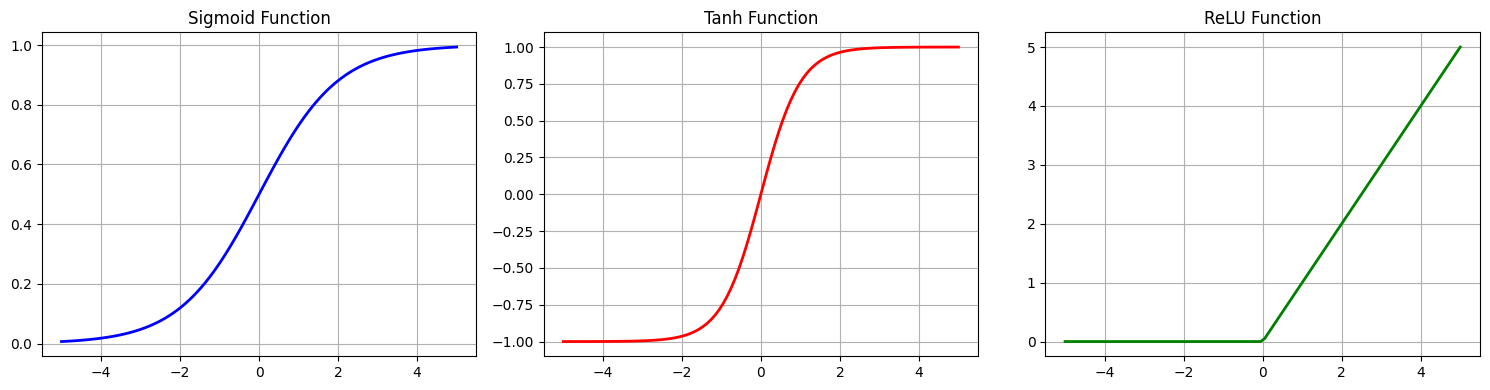

Network output shape: (5, 1)
Sample outputs: [0.20838155 0.19331024 0.20639103 0.19175342 0.18570214]


In [9]:
class Neuron:
    def __init__(self, n_inputs: int, activation: str = 'sigmoid'):
        self.weights = np.random.randn(n_inputs) * 0.5
        self.bias = np.random.rand() * 0.5
        self.activation = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def tanh(self, x):
        return np.tanh(x)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def fwd(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        if self.activation == 'sigmoid':
            return self.sigmoid(z)
        elif self.activation == 'relu':
            return self.relu(z)
        elif self.activation == 'tanh':
            return self.tanh(z)
        else:
            return z
        
def plot_activation_functions():
    x = np.linspace(-5, 5, 100)

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)
    relu = np.maximum(0, x)

    functions = [sigmoid, tanh, relu]
    titles = ["Sigmoid Function", "Tanh Function", "ReLU Function"]
    colors = ['b-', 'r-', 'g-']

    for i in range(3):
        axs[i].plot(x, functions[i], colors[i], linewidth=2)
        axs[i].set_title(titles[i])
        axs[i].grid(True)
    plt.tight_layout()
    plt.show()

class SimpleNetwork:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def fwd(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
neuron = Neuron(3, activation='sigmoid')
inputs = np.array([0.5, -0.2, 0.8])
outputs = neuron.fwd(inputs)
print(f"Neuron output: {outputs:.4f}")

plot_activation_functions()

network = SimpleNetwork(2, 4, 1)
X = np.random.randn(5, 2)
output = network.fwd(X)
print(f"Network output shape: {output.shape}")
print(f"Sample outputs: {output.flatten()}")